# Linear Regression, Single Variable

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

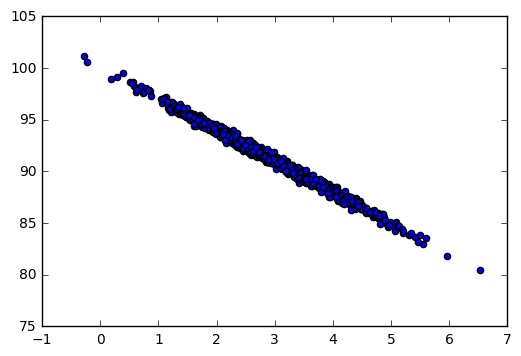

In [2]:
# We create two linearly related variables
# People spend more money on web pages which take more time for loading
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, 0.1, 1000)) * 3

plt.scatter(pageSpeeds, purchaseAmount) 

In [3]:
from scipy import stats

In [4]:
result = stats.linregress(pageSpeeds, purchaseAmount) 
result

LinregressResult(slope=-2.9999770336307194, intercept=100.01275544872856, rvalue=-0.99545724918410095, pvalue=0.0, stderr=0.0090826110640101262)

Now, we compute $R^2$ and we see it is very close to 1.

In [5]:
R2 = result.rvalue ** 2
R2

0.9909351349531772

Now, we use the slope and the intercept to plot the predicted values vs. observed:

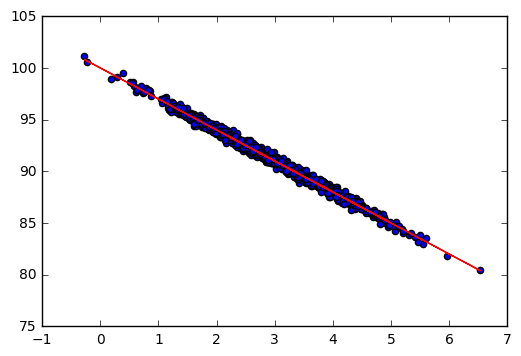

In [6]:
predicted =  result.slope * pageSpeeds + result.intercept
plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, predicted, c='r')

### Activity

Try increasing the random variation in the test data, and see what effect it has on the $R^2$ value.

# Polynomial Regression, Single Variable

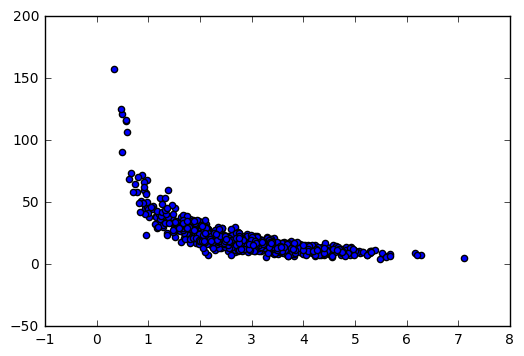

In [7]:
np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

plt.scatter(pageSpeeds, purchaseAmount) 

In [8]:
x = np.array(pageSpeeds) 
y = np.array(purchaseAmount) 

coefficients = np.polyfit(x, y, 4)
#Fit a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree deg to points (x, y). 
#Returns a vector of coefficients p that minimises the squared error.
coefficients

array([   0.54005597,   -8.85641318,   52.25378374, -135.34422815,
        147.6050662 ])

In [9]:
p4 = np.poly1d(coefficients) 
print(p4)

        4         3         2
0.5401 x - 8.856 x + 52.25 x - 135.3 x + 147.6


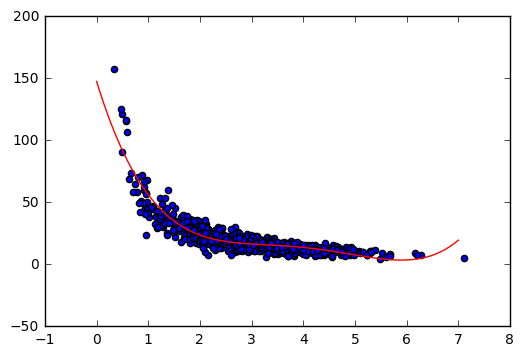

In [10]:
xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
xp = np.linspace(0, 7, 100)
plt.plot(xp, p4(xp), c = 'r')

Now we measure $R^2$ error:

In [11]:
from sklearn.metrics import r2_score
r2 = r2_score(y, p4(x))
print(r2)

0.82937663963


### Activity

Try different polynomial orders. Can you get a better fit for higher orders? Do you see overfitting? How about $R^2$?

## Train / Test

In [12]:
np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds

In [13]:
trainX = pageSpeeds[:80]
testX = pageSpeeds[80:]

trainY = purchaseAmount[:80]
testY = purchaseAmount[80:]

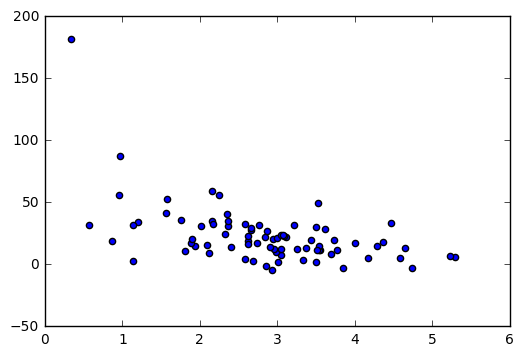

In [14]:
plt.scatter(trainX, trainY)

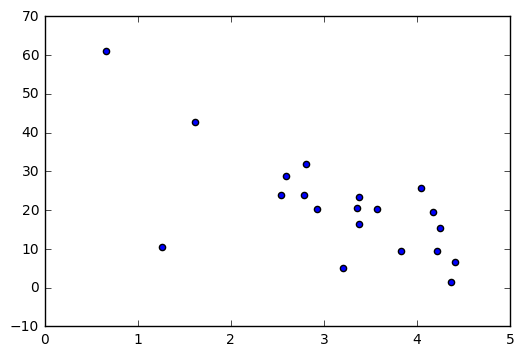

In [15]:
plt.scatter(testX, testY)

In [16]:
x = np.array(trainX)
y = np.array(trainY)

p8 = np.poly1d(np.polyfit(x, y, 8))

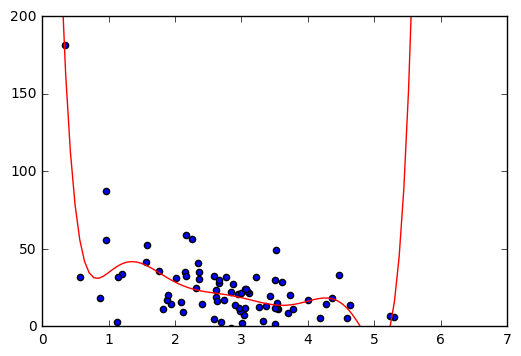

In [17]:
xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0, 7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, p8(xp), c = 'r')

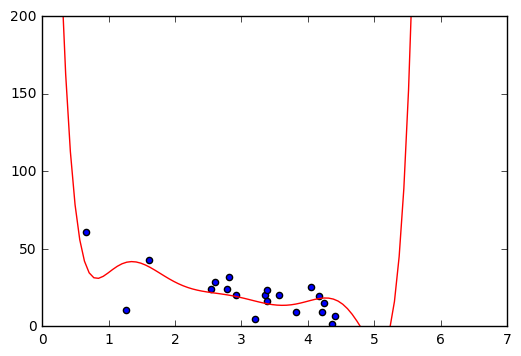

In [18]:
x = np.array(testX)
y = np.array(testY)

axes = plt.axes()
axes.set_xlim([0, 7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, p8(xp), c = 'r')

In [19]:
from sklearn.metrics import r2_score
r2_train = r2_score(np.array(trainY), p8(np.array(trainX)))
print(r2_train) 

0.642706951469


In [20]:
r2_test = r2_score(np.array(testY), p8(np.array(testX)))
print(r2_test) 

0.30018168613


### Activity

Try measuring train/test error for different polynomial degrees

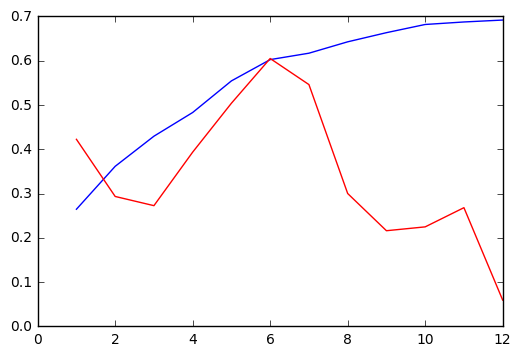

In [32]:
np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds

trainX = pageSpeeds[:80]
testX = pageSpeeds[80:]

trainY = purchaseAmount[:80]
testY = purchaseAmount[80:]

R2_train = []
R2_test = [] 
for degree in range(1, 13):
    p = np.poly1d(np.polyfit(trainX, trainY, degree))
    r2_train = r2_score(np.array(trainY), p(np.array(trainX)))
    R2_train.append(r2_train)
    r2_test = r2_score(np.array(testY), p(np.array(testX)))
    R2_test.append(r2_test)

plt.plot(range(1, 13), R2_train)
plt.plot(range(1, 13), R2_test, c = 'r')

The curve shows 6 is the best degree for the polynomial.

# Multivariate Regression

In [21]:
import pandas as pd

In [22]:
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [23]:
import statsmodels.api as sm

In [24]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df[['Sales']]

X1 = sm.add_constant(X) #This appends a column of ones
#print(X1.head())

est = sm.OLS(y, X1).fit() #A simple ordinary least squares model.
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 23 Apr 2017   Prob (F-statistic):           1.58e-96
Time:                        12:14:17   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Activity
Try other data sets for regression
You can use pd.Categorical(df.variable name).codes if needed

In [25]:
#Google regression datasets, then go to UCI repository
# download http://archive.ics.uci.edu/ml/machine-learning-databases/00360/
data = pd.read_csv('AirQualityUCI.csv', sep=';')
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
